# Logistic 回归 

采用5折交叉验证，分别用log似然损失和正确率，对Logistic回归模型的正则超参数调优。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dpath = './data/'
train = pd.read_csv(dpath + 'FE_pima-indians-diabetes.csv')
train.head()

,pregnants,Plasma_glucose_concentration,blood_pressure,Triceps_skin_fold_thickness,serum_insulin,BMI,Diabetes_pedigree_function,Age,Target
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


In [3]:
y_train = train['Target']
X_train = train.drop(['Target'], axis=1)

feat_names = X_train.columns

## 模型训练
### default Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [5]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
# 分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.model_selection import cross_val_score

loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print('logloss of each fold is: ', -loss)
print('mean cv logloss is:', -loss.mean())

logloss of each fold is:  [0.48797856 0.53011593 0.4562292  0.422546   0.48392885]
mean cv logloss is: 0.47615970944434044


E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

使用缺省参数的logistic回归模型，即正则函数penalty='l2',正则参数C=1.0

使用5折交叉验证来评价模型性能和参数调优，其中评价指标选择neg_log_loss，由于是负数，打印结果进行取反，其中损失值越小越好。

### 正则化的 LogisticRegression 及参数调优(GridSearchCV)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='liblinear')

penaltys = ['l1', 'l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(penalty = penaltys, C = Cs)

grid = GridSearchCV(lr, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=5, return_train_score=True)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  55 out of  70 | elapsed:    2.6s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    2.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_log_loss', verbose=5)

In [7]:
-grid.best_score_

0.47602647724350056

In [8]:
grid.best_params_

{'C': 1, 'penalty': 'l1'}

In [9]:
grid.cv_results_

{'mean_fit_time': array([0.00698147, 0.00738082, 0.00598426, 0.00558419, 0.00478668,
        0.00478721, 0.00458732, 0.00478768, 0.00398908, 0.00418882,
        0.00518565, 0.00558548, 0.00678549, 0.00578351]),
 'std_fit_time': array([0.00109262, 0.00079812, 0.0008917 , 0.00079832, 0.00074679,
        0.00039935, 0.00048903, 0.00039911, 0.00063098, 0.00074621,
        0.00039897, 0.00079807, 0.00171407, 0.00074723]),
 'mean_score_time': array([0.00478735, 0.00398889, 0.00398979, 0.00359035, 0.00379024,
        0.00299196, 0.00319133, 0.00299158, 0.00319161, 0.00299206,
        0.00379019, 0.00458746, 0.00398536, 0.00339122]),
 'std_score_time': array([7.46773646e-04, 6.31129378e-04, 6.30902172e-04, 4.88714193e-04,
        3.99519162e-04, 7.44843452e-07, 3.99065317e-04, 5.13569337e-07,
        7.46824552e-04, 8.91803420e-04, 3.98423267e-04, 1.73989439e-03,
        6.30725893e-04, 1.01746735e-03]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [13]:
print(grid.best_estimator_.coef_.shape)
grid.best_estimator_.coef_

(1, 8)


array([[ 0.40973524,  1.12850865, -0.092959  ,  0.02480787, -0.08407341,
         0.62914384,  0.27934245,  0.14370693]])

In [11]:
df = pd.DataFrame({'columns':list(feat_names), 'coeffient':list(grid.best_estimator_.coef_.T)})
df.sort_values(by=['coeffient'], ascending=False)

,columns,coeffient
1,Plasma_glucose_concentration,[1.1285086515671077]
5,BMI,[0.6291438439023241]
0,pregnants,[0.4097352404249829]
6,Diabetes_pedigree_function,[0.27934244764937954]
7,Age,[0.1437069324182344]
3,Triceps_skin_fold_thickness,[0.024807871576962192]
4,serum_insulin,[-0.084073412553612]
2,blood_pressure,[-0.09295899702699302]


In [14]:
# plot CV误差曲线
test_means = grid.cv_results_['mean_test_score']
test_stds = grid.cv_results_['std_test_score']
train_means = grid.cv_results_['mean_train_score']
train_stds = grid.cv_results_['std_train_score']

# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)

test_scores = test_means.reshape(n_Cs, number_penaltys)
train_scores = train_means.reshape(n_Cs, number_penaltys)
test_stds = test_stds.reshape(n_Cs, number_penaltys)
train_stds = train_stds.reshape(n_Cs, number_penaltys)

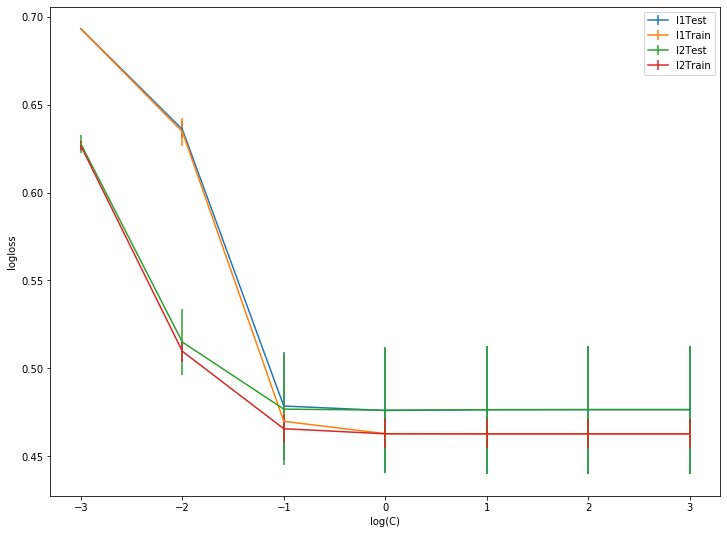

In [16]:
plt.figure(figsize=(12, 9))

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
#     plt.plot(x_axis, -test_scores[:, i], label= str(value) + 'Test')
#     plt.plot(x_axis, -train_scores[:, i], label= str(value) + 'Train')
    plt.errorbar(x_axis, -test_scores[:, i], yerr=test_stds[:, i], label = penaltys[i] + 'Test')
    plt.errorbar(x_axis, -train_scores[:, i], yerr=train_stds[:, i], label = penaltys[i] + 'Train')

plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('logloss')
plt.show()

### 换正确率做评价指标

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='liblinear')

penaltys = ['l1', 'l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(penalty = penaltys, C = Cs)

grid = GridSearchCV(lr, param_grid, cv=5, n_jobs=-1, verbose=5, return_train_score=True)  # 缺省scoring为正确率
grid.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  70 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=5)

In [18]:
grid.best_score_

0.7747395833333334

In [19]:
grid.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [20]:
grid.cv_results_

{'mean_fit_time': array([0.00437388, 0.00578561, 0.00478859, 0.00579209, 0.00458851,
        0.00498619, 0.00618386, 0.00738072, 0.00578518, 0.00618315,
        0.00578504, 0.00658245, 0.00638328, 0.00558519]),
 'std_fit_time': array([0.0008055 , 0.00074703, 0.00039933, 0.0026287 , 0.00048834,
        0.00109293, 0.00239348, 0.00223946, 0.00074577, 0.00074693,
        0.00074617, 0.00079796, 0.0007983 , 0.00149312]),
 'mean_score_time': array([0.00199466, 0.00259275, 0.00219364, 0.00159507, 0.00179462,
        0.00239382, 0.00219445, 0.00239334, 0.0025929 , 0.00339112,
        0.0019949 , 0.00259352, 0.00199442, 0.00259314]),
 'std_score_time': array([4.10190833e-07, 4.88383904e-04, 3.99259668e-04, 4.88461902e-04,
        3.98541153e-04, 4.88052245e-04, 3.98971089e-04, 4.88246850e-04,
        1.19740965e-03, 2.32614801e-03, 4.10190833e-07, 4.88616644e-04,
        6.31128185e-04, 1.35288771e-03]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [21]:
df = pd.DataFrame({'columns':list(feat_names), 'coeffient':list(grid.best_estimator_.coef_.T)})
df.sort_values(by=['coeffient'], ascending=False)

,columns,coeffient
1,Plasma_glucose_concentration,[0.9977309169127753]
5,BMI,[0.5460044910698728]
0,pregnants,[0.3616713513905088]
6,Diabetes_pedigree_function,[0.2599038326076921]
7,Age,[0.1554435734114967]
3,Triceps_skin_fold_thickness,[0.05966520979020303]
4,serum_insulin,[-0.04513553103768548]
2,blood_pressure,[-0.0648660966137046]


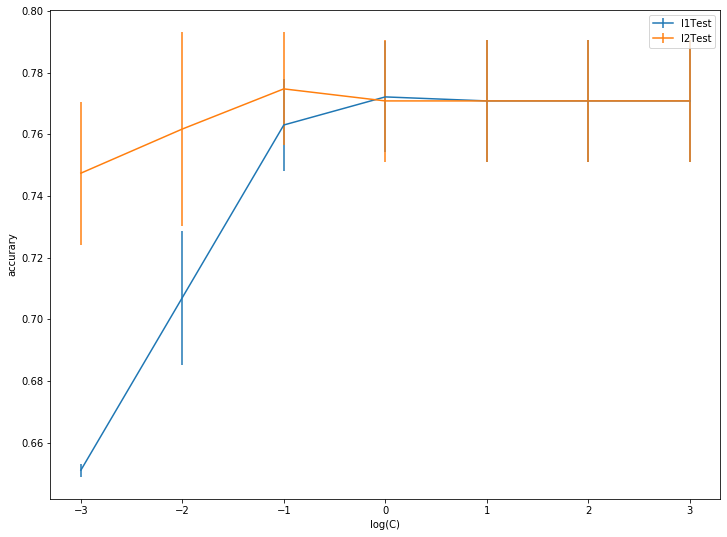

In [23]:
# plot CV误差曲线
test_means = grid.cv_results_['mean_test_score']
test_stds = grid.cv_results_['std_test_score']
train_means = grid.cv_results_['mean_train_score']
train_stds = grid.cv_results_['std_train_score']

# plot results
n_Cs = len(Cs)
number_penaltys = len(penaltys)

test_scores = test_means.reshape(n_Cs, number_penaltys)
train_scores = train_means.reshape(n_Cs, number_penaltys)
test_stds = test_stds.reshape(n_Cs, number_penaltys)
train_stds = train_stds.reshape(n_Cs, number_penaltys)

plt.figure(figsize=(12, 9))

x_axis = np.log10(Cs)
for i, value in enumerate(penaltys):
#     plt.plot(x_axis, test_scores[:, i], label= str(value) + 'Test')
#     plt.plot(x_axis, train_scores[:, i], label= str(value) + 'Train')
    plt.errorbar(x_axis, test_scores[:, i], yerr=test_stds[:, i], label = penaltys[i] + 'Test')
    #plt.errorbar(x_axis, train_scores[:, i], yerr=train_stds[:, i], label = penaltys[i] + 'Train')

plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('accurary')
plt.show()